# WeatherPy
----
## Observable Trends
#### 
* There is a strong relationship between latitude and temperature (R-squared value > 0.7). On the Northern Hemisphere, temperature decreases with the increase in latitude. As latitude increases (i.e as we're getting further away from the equator), the sun shines more indirectly. 

* The opposite is true for the Southern Hemisphere. The increase in latitude means the closer we are to the equator and hence leads to an increase in the temperature.

* There is moderate positive relationship between latitude and humidity (R-squared value ~0.15-0.28). In both Northern and Southern hemisphere, the increase in latitude leads to the increase in humidity as a humid, tropical climate can be found near the equator (Latitude = 0).

* Wind speed does not seem to be correlated to the latitude. However, in the Southern Hemisphere, R-squared value of the line regression between wind speed and city latitude is higher, possibly due to its larger ocean body of water causing an increased in wind flow


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using city nearest_city(function)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
# Perform API request for all cities in cities list

# set up lists to hold response info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of test_cities and perform a request for data on each
print(f"Beginning Data Retrieval \n-----------------------------\n")

city_number = 0
# make API calls in multiple sets, API call limits = 50
API_call_set = 1

for city in cities:
    response = requests.get(query_url + city).json()

    # Try to grab the weather and city information if they are available:
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f"Processing Record {city_number} of Set {API_call_set} | {response['name']}")
        city_number +=1 

    except (KeyError, IndexError):
        print(f"{city} could not be resolved - skipping.")
        pass

    # If statement to handle API call limits
    if city_number == 50:
        API_call_set += 1
        city_number = 1

llowknife
Processing Record 32 of Set 3 | Chokurdakh
Processing Record 33 of Set 3 | Praia
Processing Record 34 of Set 3 | Sudak
Processing Record 35 of Set 3 | Lagoa
Processing Record 36 of Set 3 | Xining
Processing Record 37 of Set 3 | Madang
marcona could not be resolved - skipping.
Processing Record 38 of Set 3 | Paamiut
Processing Record 39 of Set 3 | Bereket
Processing Record 40 of Set 3 | Sinnamary
Processing Record 41 of Set 3 | Tuatapere
Processing Record 42 of Set 3 | Myjava
Processing Record 43 of Set 3 | Santa Fé do Sul
Processing Record 44 of Set 3 | Longyearbyen
Processing Record 45 of Set 3 | Olinda
Processing Record 46 of Set 3 | Homer
samusu could not be resolved - skipping.
Processing Record 47 of Set 3 | Lebu
Processing Record 48 of Set 3 | Āmol
Processing Record 49 of Set 3 | Hithadhoo
Processing Record 1 of Set 4 | Sørland
Processing Record 2 of Set 4 | Muzhi
Processing Record 3 of Set 4 | Pita
Processing Record 4 of Set 4 | Esim
Processing Record 5 of Set 4 | Zhig

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)


In [14]:
# Save Data to csv
weather_data.to_csv("../output_data/WeatherPy_Output.csv")

# Visualize to confirm data appears
weather_data.head(5)

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Hilo,90,US,1587244334,51,19.73,-155.09,27.00,4.10
1,1,Labuhan,76,ID,1587244334,85,-6.88,112.21,25.89,1.70
2,2,East London,0,ZA,1587244334,66,-33.02,27.91,21.79,7.84
3,3,Vao,74,NC,1587244334,69,-22.67,167.48,24.27,4.49
4,4,Vaini,75,TO,1587244334,78,-21.20,-175.20,26.00,5.10


### Plotting the Data

#### Latitude vs. Temperature Plot

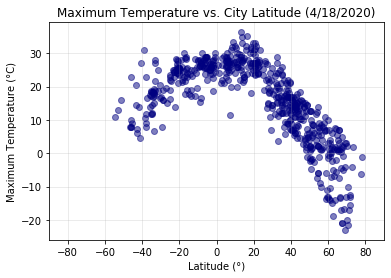

In [15]:
weather_data = pd.read_csv('../output_data/WeatherPy_Output.csv')

x_values_latitude = weather_data["Lat"]
y_values_max_temp = weather_data["Max Temp"]

plt.scatter(x_values_latitude, y_values_max_temp, c = "navy", alpha = 0.5)
plt.xlabel("Latitude (°)")
plt.ylabel("Maximum Temperature (°C)")
plt.grid(alpha=0.3)
plt.title("Maximum Temperature vs. City Latitude (4/18/2020)")
plt.xlim((-90,90))

plt.show()
# lat_range = (-90, 90)
# lng_range = (-180, 180)

#### Latitude vs. Humidity Plot

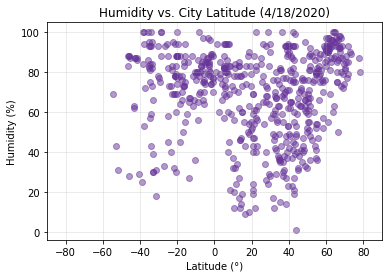

In [16]:
y_values_humidity = weather_data["Humidity"]

plt.scatter(x_values_latitude, y_values_humidity, c = "rebeccapurple", alpha = 0.5)
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.3)
plt.title("Humidity vs. City Latitude (4/18/2020)")
plt.xlim((-90,90))

plt.show()

#### Latitude vs. Cloudiness Plot

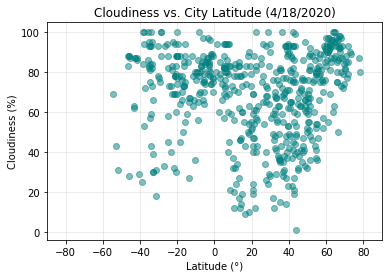

In [17]:
y_values_cloudiness = weather_data["Cloudiness"]

plt.scatter(x_values_latitude, y_values_humidity, c = "teal", alpha = 0.5)
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.3)
plt.title("Cloudiness vs. City Latitude (4/18/2020)")
plt.xlim((-90,90))

plt.show()

#### Latitude vs. Wind Speed Plot

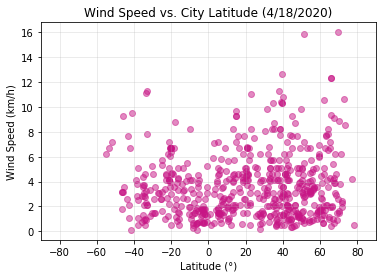

In [18]:
y_values_wind_speed = weather_data["Wind Speed"]

plt.scatter(x_values_latitude, y_values_wind_speed, c = "mediumvioletred", alpha = 0.5)
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (km/h)")
plt.grid(alpha=0.3)
plt.title("Wind Speed vs. City Latitude (4/18/2020)")
plt.xlim((-90,90))

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data.Lat >= 0]
southern_df = weather_data.loc[weather_data.Lat <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

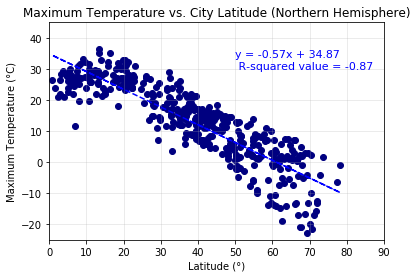

In [29]:
from scipy.stats import linregress

x_values_latitude_north = northern_df.Lat
y_values_max_temp_north = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_north, y_values_max_temp_north)
north_regress_values = x_values_latitude_north * slope + intercept
line_eq_north = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_north,y_values_max_temp_north, color="navy")
plt.plot(x_values_latitude_north,north_regress_values,"--",color="blue")
plt.annotate(line_eq_north, (50,30), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Maximum Temperature (°C)")
plt.grid(alpha=0.3)
plt.title("Maximum Temperature vs. City Latitude (Northern Hemisphere)")
plt.xlim((0,90))
plt.ylim((-25,45))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

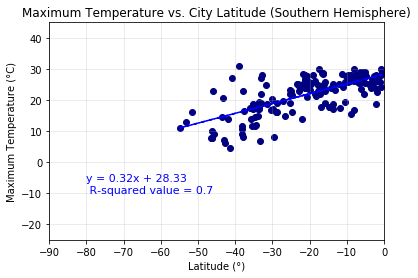

In [34]:
x_values_latitude_south = southern_df.Lat
y_values_max_temp_south = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_south, y_values_max_temp_south)
south_regress_values = x_values_latitude_south * slope + intercept
line_eq_south = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_south,y_values_max_temp_south, color="navy")
plt.plot(x_values_latitude_south,south_regress_values,"--",color="blue")
plt.annotate(line_eq_south, (-80,-10), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Maximum Temperature (°C)")
plt.grid(alpha=0.3)
plt.title("Maximum Temperature vs. City Latitude (Southern Hemisphere)")
plt.xlim((-90,0))
plt.ylim((-25,45))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

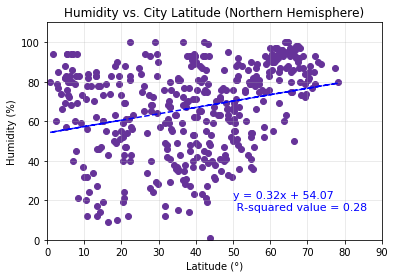

In [53]:
x_values_latitude_north = northern_df.Lat
y_values_humidity_north = northern_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_north, y_values_humidity_north)
north_regress_values = x_values_latitude_north * slope + intercept
line_eq_north = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_north,y_values_humidity_north, color="rebeccapurple")
plt.plot(x_values_latitude_north, north_regress_values,"--",color="blue")
plt.annotate(line_eq_north, (50,15), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.3)
plt.title("Humidity vs. City Latitude (Northern Hemisphere)")
plt.xlim((0,90))
plt.ylim((0,110))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

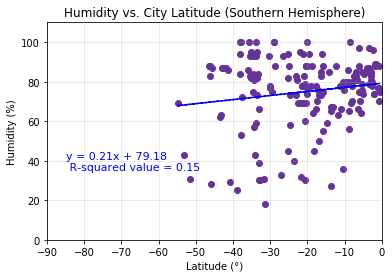

In [52]:
x_values_latitude_south = southern_df.Lat
y_values_humidity_south = southern_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_south, y_values_humidity_south)
regress_values = x_values_latitude_south * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_south, y_values_humidity_south, color="rebeccapurple")
plt.plot(x_values_latitude_south, regress_values,"--",color="blue")
plt.annotate(line_eq, (-85,35), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.3)
plt.title("Humidity vs. City Latitude (Southern Hemisphere)")
plt.xlim((-90,0))
plt.ylim((0,110))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

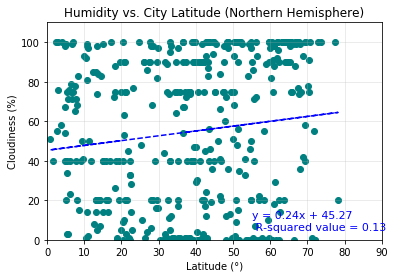

In [57]:
x_values_latitude_north = northern_df.Lat
y_values_cloudiness_north = northern_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_north, y_values_cloudiness_north)
regress_values = x_values_latitude_north * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_north,y_values_cloudiness_north, color="teal")
plt.plot(x_values_latitude_north, regress_values,"--",color="blue")
plt.annotate(line_eq, (55,5), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.3)
plt.title("Humidity vs. City Latitude (Northern Hemisphere)")
plt.xlim((0,90))
plt.ylim((0,110))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

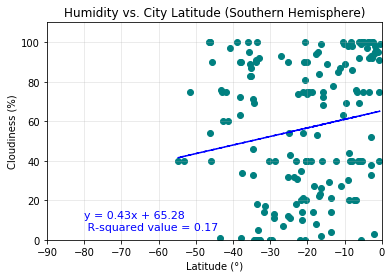

In [77]:
x_values_latitude_south = southern_df.Lat
y_values_cloudiness_south = southern_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_south, y_values_cloudiness_south)
regress_values = x_values_latitude_south * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_south,y_values_cloudiness_south, color="teal")
plt.plot(x_values_latitude_south, regress_values,"--",color="blue")
plt.annotate(line_eq, (-80,5), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.3)
plt.title("Humidity vs. City Latitude (Southern Hemisphere)")
plt.xlim((-90,0))
plt.ylim((0,110))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

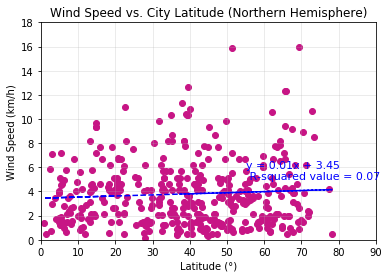

In [75]:
x_values_latitude_north = northern_df.Lat
y_values_wind_north = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_north, y_values_wind_north)
regress_values = x_values_latitude_north * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_north,y_values_wind_north, color="mediumvioletred")
plt.plot(x_values_latitude_north, regress_values,"--",color="blue")
plt.annotate(line_eq, (55,5), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (km/h)")
plt.grid(alpha=0.3)
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.xlim((0,90))
plt.ylim((0,18))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

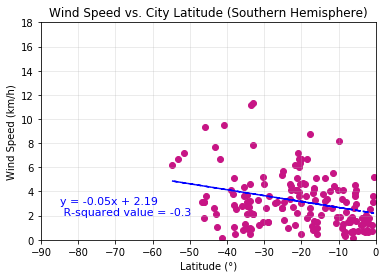

In [76]:
x_values_latitude_south = southern_df.Lat
y_values_wind_south = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude_south, y_values_wind_south)
regress_values = x_values_latitude_south * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)} \n R-squared value = {round(rvalue,2)}"

plt.scatter(x_values_latitude_south,y_values_wind_south, color="mediumvioletred")
plt.plot(x_values_latitude_south, regress_values,"--",color="blue")
plt.annotate(line_eq, (-85,2), fontsize=11, color="blue")

plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (km/h)")
plt.grid(alpha=0.3)
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.xlim((-90,0))
plt.ylim((0,18))
plt.show()